### 텐서플로 버전과 동작 확인

In [ ]:
import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.9.1
tf.Tensor(
[[0.6400666  0.73201156 0.31979704]
 [0.18421686 0.17008293 0.3705449 ]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### tensorflow와 numpy의 호환

In [ ]:
import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.48698473 0.68680775 0.17165196]
 [0.57685685 0.76515055 0.69753206]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.67047499 0.12152815 0.43559716]
 [0.00317256 0.39821821 0.5135917 ]] 

덧셈 결과:
 tf.Tensor(
[[1.1574597  0.8083359  0.60724914]
 [0.5800294  1.1633687  1.2111237 ]], shape=(2, 3), dtype=float32)


### 텐서플로가 제공하는 데이터셋의 텐서 구조 확인하기

In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST: ",x_train.shape,y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10: ",x_train.shape,y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
print("Boston Housing: ",x_train.shape,y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.reuters.load_data()
print("Reuters: ",x_train.shape,y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
MNIST:  (60000, 28, 28) (60000,) (60000, 10)
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
57026/57026 [==============================] - 0s 0us/step
Boston Housing:  (404, 13) (404,)
2110848/2110848 [==============================] - 0s 0us/step
Reuters:  (8982,) (8982,)


### 텐서플로 프로그래밍: [예제 4-1]의 퍼셉트론 동작

In [ ]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# [그림 4-3(b)]의 퍼셉트론
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

# 식 4.3의 퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


### 텐서플로 프로그래밍: 퍼셉트론 학습

In [ ]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 가중치 초기화
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))

# 옵티마이저
opt=tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산(식 (4.3))
def forward():
  s=tf.add(tf.matmul(x,w),b)
  o=tf.tanh(s)
  return o

# 손실 함수 정의
def loss():
  o=forward()
  return tf.reduce_mean((y-o)**2)

# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
  opt.minimize(loss, var_list=[w,b])
  if(i%100==0): print('loss at epoch',i,'=',loss().numpy())

# 학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 0.9988029
loss at epoch 100 = 0.095053256
loss at epoch 200 = 0.04311986
loss at epoch 300 = 0.026933938
loss at epoch 400 = 0.01933427
tf.Tensor(
[[-0.81551635]
 [ 0.8858329 ]
 [ 0.88593143]
 [ 0.99925625]], shape=(4, 1), dtype=float32)


### 프로그램 5-6 [케라스 프로그래밍: 퍼셉트론 학습]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 신경망 구조 설계
n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

# 학습된 신경망으로 예측
res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 2s - loss: 0.9289 - mse: 0.9289 - 2s/epoch - 2s/step
Epoch 2/500
1/1 - 0s - loss: 0.7118 - mse: 0.7118 - 15ms/epoch - 15ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6173 - mse: 0.6173 - 3ms/epoch - 3ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5693 - mse: 0.5693 - 6ms/epoch - 6ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5393 - mse: 0.5393 - 5ms/epoch - 5ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5174 - mse: 0.5174 - 12ms/epoch - 12ms/step
Epoch 7/500
1/1 - 0s - loss: 0.4994 - mse: 0.4994 - 11ms/epoch - 11ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4837 - mse: 0.4837 - 24ms/epoch - 24ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4694 - mse: 0.4694 - 4ms/epoch - 4ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4560 - mse: 0.4560 - 16ms/epoch - 16ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4433 - mse: 0.4433 - 7ms/epoch - 7ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4312 - mse: 0.4312 - 12ms/epoch - 12ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4196 - mse: 0.4196 - 10ms/epoch - 10ms/step
Epoch 14/500
1/1 - 0s - loss: 0.408

Epoch 110/500
1/1 - 0s - loss: 0.0837 - mse: 0.0837 - 12ms/epoch - 12ms/step
Epoch 111/500
1/1 - 0s - loss: 0.0828 - mse: 0.0828 - 8ms/epoch - 8ms/step
Epoch 112/500
1/1 - 0s - loss: 0.0820 - mse: 0.0820 - 8ms/epoch - 8ms/step
Epoch 113/500
1/1 - 0s - loss: 0.0812 - mse: 0.0812 - 7ms/epoch - 7ms/step
Epoch 114/500
1/1 - 0s - loss: 0.0804 - mse: 0.0804 - 13ms/epoch - 13ms/step
Epoch 115/500
1/1 - 0s - loss: 0.0797 - mse: 0.0797 - 10ms/epoch - 10ms/step
Epoch 116/500
1/1 - 0s - loss: 0.0789 - mse: 0.0789 - 4ms/epoch - 4ms/step
Epoch 117/500
1/1 - 0s - loss: 0.0782 - mse: 0.0782 - 5ms/epoch - 5ms/step
Epoch 118/500
1/1 - 0s - loss: 0.0774 - mse: 0.0774 - 8ms/epoch - 8ms/step
Epoch 119/500
1/1 - 0s - loss: 0.0767 - mse: 0.0767 - 13ms/epoch - 13ms/step
Epoch 120/500
1/1 - 0s - loss: 0.0760 - mse: 0.0760 - 12ms/epoch - 12ms/step
Epoch 121/500
1/1 - 0s - loss: 0.0753 - mse: 0.0753 - 12ms/epoch - 12ms/step
Epoch 122/500
1/1 - 0s - loss: 0.0746 - mse: 0.0746 - 12ms/epoch - 12ms/step
Epoch 123/5

Epoch 217/500
1/1 - 0s - loss: 0.0388 - mse: 0.0388 - 12ms/epoch - 12ms/step
Epoch 218/500
1/1 - 0s - loss: 0.0386 - mse: 0.0386 - 13ms/epoch - 13ms/step
Epoch 219/500
1/1 - 0s - loss: 0.0384 - mse: 0.0384 - 15ms/epoch - 15ms/step
Epoch 220/500
1/1 - 0s - loss: 0.0382 - mse: 0.0382 - 12ms/epoch - 12ms/step
Epoch 221/500
1/1 - 0s - loss: 0.0380 - mse: 0.0380 - 18ms/epoch - 18ms/step
Epoch 222/500
1/1 - 0s - loss: 0.0378 - mse: 0.0378 - 14ms/epoch - 14ms/step
Epoch 223/500
1/1 - 0s - loss: 0.0376 - mse: 0.0376 - 15ms/epoch - 15ms/step
Epoch 224/500
1/1 - 0s - loss: 0.0374 - mse: 0.0374 - 12ms/epoch - 12ms/step
Epoch 225/500
1/1 - 0s - loss: 0.0372 - mse: 0.0372 - 18ms/epoch - 18ms/step
Epoch 226/500
1/1 - 0s - loss: 0.0370 - mse: 0.0370 - 20ms/epoch - 20ms/step
Epoch 227/500
1/1 - 0s - loss: 0.0368 - mse: 0.0368 - 15ms/epoch - 15ms/step
Epoch 228/500
1/1 - 0s - loss: 0.0366 - mse: 0.0366 - 11ms/epoch - 11ms/step
Epoch 229/500
1/1 - 0s - loss: 0.0364 - mse: 0.0364 - 18ms/epoch - 18ms/step

Epoch 324/500
1/1 - 0s - loss: 0.0245 - mse: 0.0245 - 19ms/epoch - 19ms/step
Epoch 325/500
1/1 - 0s - loss: 0.0244 - mse: 0.0244 - 18ms/epoch - 18ms/step
Epoch 326/500
1/1 - 0s - loss: 0.0243 - mse: 0.0243 - 14ms/epoch - 14ms/step
Epoch 327/500
1/1 - 0s - loss: 0.0242 - mse: 0.0242 - 12ms/epoch - 12ms/step
Epoch 328/500
1/1 - 0s - loss: 0.0241 - mse: 0.0241 - 20ms/epoch - 20ms/step
Epoch 329/500
1/1 - 0s - loss: 0.0240 - mse: 0.0240 - 13ms/epoch - 13ms/step
Epoch 330/500
1/1 - 0s - loss: 0.0239 - mse: 0.0239 - 14ms/epoch - 14ms/step
Epoch 331/500
1/1 - 0s - loss: 0.0239 - mse: 0.0239 - 12ms/epoch - 12ms/step
Epoch 332/500
1/1 - 0s - loss: 0.0238 - mse: 0.0238 - 17ms/epoch - 17ms/step
Epoch 333/500
1/1 - 0s - loss: 0.0237 - mse: 0.0237 - 20ms/epoch - 20ms/step
Epoch 334/500
1/1 - 0s - loss: 0.0236 - mse: 0.0236 - 19ms/epoch - 19ms/step
Epoch 335/500
1/1 - 0s - loss: 0.0235 - mse: 0.0235 - 18ms/epoch - 18ms/step
Epoch 336/500
1/1 - 0s - loss: 0.0235 - mse: 0.0235 - 8ms/epoch - 8ms/step
E

1/1 - 0s - loss: 0.0176 - mse: 0.0176 - 13ms/epoch - 13ms/step
Epoch 432/500
1/1 - 0s - loss: 0.0176 - mse: 0.0176 - 19ms/epoch - 19ms/step
Epoch 433/500
1/1 - 0s - loss: 0.0176 - mse: 0.0176 - 19ms/epoch - 19ms/step
Epoch 434/500
1/1 - 0s - loss: 0.0175 - mse: 0.0175 - 19ms/epoch - 19ms/step
Epoch 435/500
1/1 - 0s - loss: 0.0175 - mse: 0.0175 - 20ms/epoch - 20ms/step
Epoch 436/500
1/1 - 0s - loss: 0.0174 - mse: 0.0174 - 19ms/epoch - 19ms/step
Epoch 437/500
1/1 - 0s - loss: 0.0174 - mse: 0.0174 - 19ms/epoch - 19ms/step
Epoch 438/500
1/1 - 0s - loss: 0.0173 - mse: 0.0173 - 19ms/epoch - 19ms/step
Epoch 439/500
1/1 - 0s - loss: 0.0173 - mse: 0.0173 - 18ms/epoch - 18ms/step
Epoch 440/500
1/1 - 0s - loss: 0.0172 - mse: 0.0172 - 19ms/epoch - 19ms/step
Epoch 441/500
1/1 - 0s - loss: 0.0172 - mse: 0.0172 - 19ms/epoch - 19ms/step
Epoch 442/500
1/1 - 0s - loss: 0.0172 - mse: 0.0172 - 21ms/epoch - 21ms/step
Epoch 443/500
1/1 - 0s - loss: 0.0171 - mse: 0.0171 - 15ms/epoch - 15ms/step
Epoch 444/500

### 프로그램 5-7 [텐서플로 프로그래밍: 다층 퍼셉트론으로 MNIST 인식]

Epoch 1/30
469/469 - 5s - loss: 0.0426 - accuracy: 0.8434 - val_loss: 0.0276 - val_accuracy: 0.9083 - 5s/epoch - 10ms/step
Epoch 2/30
469/469 - 5s - loss: 0.0223 - accuracy: 0.9297 - val_loss: 0.0181 - val_accuracy: 0.9409 - 5s/epoch - 10ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0165 - accuracy: 0.9476 - val_loss: 0.0145 - val_accuracy: 0.9512 - 3s/epoch - 7ms/step
Epoch 4/30
469/469 - 3s - loss: 0.0136 - accuracy: 0.9568 - val_loss: 0.0129 - val_accuracy: 0.9592 - 3s/epoch - 7ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0121 - accuracy: 0.9633 - val_loss: 0.0125 - val_accuracy: 0.9608 - 3s/epoch - 7ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0110 - accuracy: 0.9675 - val_loss: 0.0109 - val_accuracy: 0.9641 - 3s/epoch - 7ms/step
Epoch 7/30
469/469 - 3s - loss: 0.0101 - accuracy: 0.9704 - val_loss: 0.0100 - val_accuracy: 0.9662 - 3s/epoch - 7ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0094 - accuracy: 0.9736 - val_loss: 0.0104 - val_accuracy: 0.9682 - 3s/epoch - 6ms/step
Epoch 9/30
469/469 - 3

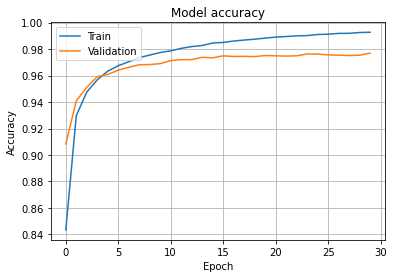

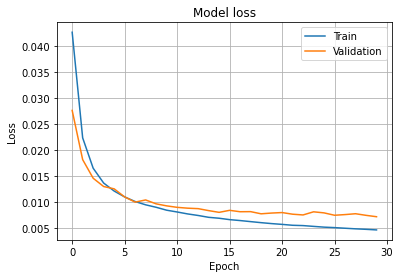

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # 인접한 두 층이 완전연결된 경우에는 Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설계
n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 학습된 신경망으로 예측
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.grid()
plt.show()

### 프로그램 5-8 [텐서플로 프로그래밍: 다층 퍼셉트론으로 fashion MNIST 인식]

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 5s - loss: 0.0651 - accuracy: 0.6959 - val_loss: 0.0341 - val_accuracy: 0.8191 - 5s/epoch - 11ms/step
Epoch 2/30
469/469 - 5s - loss: 0.0307 - accuracy: 0.8426 - val_loss: 0.0289 - val_accuracy: 0.8374 - 5s/epoch - 10ms/step
Epoch 3/30
469/469 - 4s - loss: 0.0271 - accuracy: 0.8575 - val_loss: 0.0265 - val_accuracy: 0.8499 - 4s/epoch - 8ms/step
Epoch 4/30
469/469 - 4s - loss: 0.0252 - accuracy: 0.8661 - val_loss: 0.0261 - val_accuracy: 0.8537 - 4s/epoch - 8ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0236 - accuracy: 0.8733 - val_loss: 0.0245 - val_accuracy: 0.8601 - 3s/epoch - 6ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0226 - accuracy: 0.8792 - val_loss: 0.0236 - val_accuracy: 0.8639 - 3s/epoch - 7ms/step
Epoch 7/30
469/469 - 3s - loss: 0.0216 - accuracy: 0.8844 - val_loss: 0.0238 - val_accuracy: 0.8652 - 3s/epoch - 7ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0208 - accuracy: 0.8883 - val_loss: 0.0224 - va

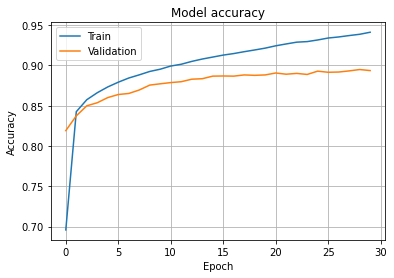

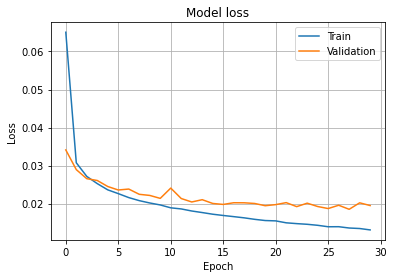

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # 인접한 두 층이 완전연결된 경우에는 Dense
from tensorflow.keras.optimizers import Adam

# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설계
n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 학습된 신경망으로 예측
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.grid()
plt.show()

### 프로그램 5-9 [깊은 다층 퍼셉트론으로 MNIST 인식]

Epoch 1/30
469/469 - 8s - loss: 0.0259 - accuracy: 0.8969 - val_loss: 0.0133 - val_accuracy: 0.9405 - 8s/epoch - 16ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0105 - accuracy: 0.9533 - val_loss: 0.0089 - val_accuracy: 0.9593 - 8s/epoch - 17ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0070 - accuracy: 0.9672 - val_loss: 0.0069 - val_accuracy: 0.9650 - 8s/epoch - 16ms/step
Epoch 4/30
469/469 - 6s - loss: 0.0054 - accuracy: 0.9747 - val_loss: 0.0062 - val_accuracy: 0.9710 - 6s/epoch - 13ms/step
Epoch 5/30
469/469 - 6s - loss: 0.0045 - accuracy: 0.9793 - val_loss: 0.0052 - val_accuracy: 0.9727 - 6s/epoch - 14ms/step
Epoch 6/30
469/469 - 9s - loss: 0.0039 - accuracy: 0.9821 - val_loss: 0.0055 - val_accuracy: 0.9711 - 9s/epoch - 20ms/step
Epoch 7/30
469/469 - 8s - loss: 0.0034 - accuracy: 0.9845 - val_loss: 0.0057 - val_accuracy: 0.9692 - 8s/epoch - 17ms/step
Epoch 8/30
469/469 - 6s - loss: 0.0030 - accuracy: 0.9865 - val_loss: 0.0046 - val_accuracy: 0.9751 - 6s/epoch - 13ms/step
Epoch 9/30
469/4

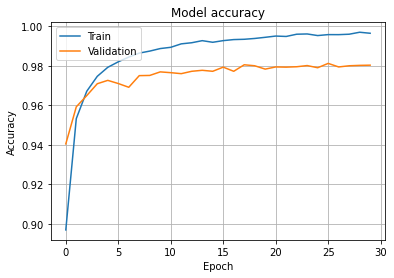

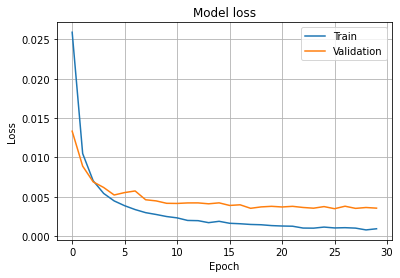

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 학습된 신경망으로 예측
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.grid()
plt.show()

### 프로그램 5-10 [손실 함수의 성능 비교: 평균제곱오차의 교차 엔트로피]

Epoch 1/30
469/469 - 6s - loss: 0.0155 - accuracy: 0.8961 - val_loss: 0.0086 - val_accuracy: 0.9445 - 6s/epoch - 13ms/step
Epoch 2/30
469/469 - 9s - loss: 0.0079 - accuracy: 0.9490 - val_loss: 0.0067 - val_accuracy: 0.9569 - 9s/epoch - 20ms/step
Epoch 3/30
469/469 - 6s - loss: 0.0061 - accuracy: 0.9610 - val_loss: 0.0062 - val_accuracy: 0.9602 - 6s/epoch - 13ms/step
Epoch 4/30
469/469 - 9s - loss: 0.0049 - accuracy: 0.9688 - val_loss: 0.0057 - val_accuracy: 0.9640 - 9s/epoch - 20ms/step
Epoch 5/30
469/469 - 7s - loss: 0.0043 - accuracy: 0.9728 - val_loss: 0.0050 - val_accuracy: 0.9680 - 7s/epoch - 14ms/step
Epoch 6/30
469/469 - 6s - loss: 0.0041 - accuracy: 0.9736 - val_loss: 0.0050 - val_accuracy: 0.9689 - 6s/epoch - 12ms/step
Epoch 7/30
469/469 - 6s - loss: 0.0035 - accuracy: 0.9781 - val_loss: 0.0058 - val_accuracy: 0.9631 - 6s/epoch - 12ms/step
Epoch 8/30
469/469 - 6s - loss: 0.0032 - accuracy: 0.9803 - val_loss: 0.0044 - val_accuracy: 0.9713 - 6s/epoch - 12ms/step
Epoch 9/30
469/4

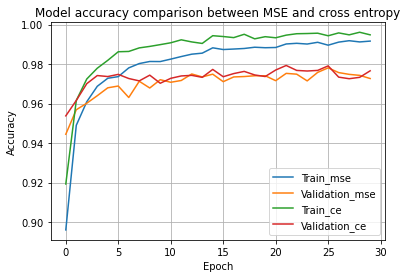

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add(Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 학습된 신경망으로 예측
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'], loc='best')
plt.grid()
plt.show()

### 프로그램 5-11 [옵티마이저의 성능 비교: SGD, Adam, Adagrad, RMSprop]

Epoch 1/50
235/235 - 3s - loss: 1.7808 - accuracy: 0.6041 - val_loss: 0.9593 - val_accuracy: 0.8169 - 3s/epoch - 13ms/step
Epoch 2/50
235/235 - 2s - loss: 0.6392 - accuracy: 0.8494 - val_loss: 0.4464 - val_accuracy: 0.8836 - 2s/epoch - 8ms/step
Epoch 3/50
235/235 - 2s - loss: 0.4076 - accuracy: 0.8903 - val_loss: 0.3534 - val_accuracy: 0.9033 - 2s/epoch - 8ms/step
Epoch 4/50
235/235 - 2s - loss: 0.3402 - accuracy: 0.9046 - val_loss: 0.3059 - val_accuracy: 0.9143 - 2s/epoch - 8ms/step
Epoch 5/50
235/235 - 2s - loss: 0.3034 - accuracy: 0.9140 - val_loss: 0.2775 - val_accuracy: 0.9213 - 2s/epoch - 8ms/step
Epoch 6/50
235/235 - 2s - loss: 0.2783 - accuracy: 0.9208 - val_loss: 0.2570 - val_accuracy: 0.9282 - 2s/epoch - 8ms/step
Epoch 7/50
235/235 - 2s - loss: 0.2587 - accuracy: 0.9257 - val_loss: 0.2438 - val_accuracy: 0.9294 - 2s/epoch - 7ms/step
Epoch 8/50
235/235 - 2s - loss: 0.2429 - accuracy: 0.9297 - val_loss: 0.2263 - val_accuracy: 0.9352 - 2s/epoch - 8ms/step
Epoch 9/50
235/235 - 2s

Epoch 18/50
235/235 - 2s - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.0799 - val_accuracy: 0.9806 - 2s/epoch - 8ms/step
Epoch 19/50
235/235 - 2s - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0955 - val_accuracy: 0.9795 - 2s/epoch - 8ms/step
Epoch 20/50
235/235 - 2s - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0901 - val_accuracy: 0.9828 - 2s/epoch - 8ms/step
Epoch 21/50
235/235 - 2s - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0897 - val_accuracy: 0.9831 - 2s/epoch - 8ms/step
Epoch 22/50
235/235 - 2s - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0898 - val_accuracy: 0.9815 - 2s/epoch - 8ms/step
Epoch 23/50
235/235 - 2s - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.1010 - val_accuracy: 0.9830 - 2s/epoch - 9ms/step
Epoch 24/50
235/235 - 2s - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.1051 - val_accuracy: 0.9790 - 2s/epoch - 9ms/step
Epoch 25/50
235/235 - 2s - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0815 - val_accuracy: 0.9815 - 2s/epoch - 8ms/step
Epoch 26/50
235/

Epoch 35/50
235/235 - 2s - loss: 0.2079 - accuracy: 0.9408 - val_loss: 0.2030 - val_accuracy: 0.9412 - 2s/epoch - 10ms/step
Epoch 36/50
235/235 - 2s - loss: 0.2048 - accuracy: 0.9419 - val_loss: 0.2010 - val_accuracy: 0.9415 - 2s/epoch - 9ms/step
Epoch 37/50
235/235 - 2s - loss: 0.2019 - accuracy: 0.9427 - val_loss: 0.1982 - val_accuracy: 0.9423 - 2s/epoch - 10ms/step
Epoch 38/50
235/235 - 2s - loss: 0.1990 - accuracy: 0.9434 - val_loss: 0.1962 - val_accuracy: 0.9433 - 2s/epoch - 10ms/step
Epoch 39/50
235/235 - 2s - loss: 0.1962 - accuracy: 0.9443 - val_loss: 0.1935 - val_accuracy: 0.9438 - 2s/epoch - 10ms/step
Epoch 40/50
235/235 - 2s - loss: 0.1935 - accuracy: 0.9451 - val_loss: 0.1908 - val_accuracy: 0.9438 - 2s/epoch - 10ms/step
Epoch 41/50
235/235 - 3s - loss: 0.1908 - accuracy: 0.9460 - val_loss: 0.1892 - val_accuracy: 0.9456 - 3s/epoch - 14ms/step
Epoch 42/50
235/235 - 2s - loss: 0.1883 - accuracy: 0.9464 - val_loss: 0.1867 - val_accuracy: 0.9456 - 2s/epoch - 10ms/step
Epoch 43/

Adadm 정확률은 98.36999773979187
Adagrad 정확률은 94.95999813079834
RMSprop 정확률은 98.51999878883362


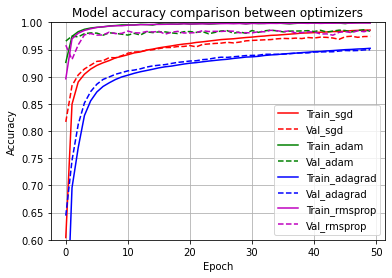

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50

def build_model():
  model=Sequential()
  model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2,activation='relu'))
  model.add(Dense(units=n_hidden3,activation='relu'))
  model.add(Dense(units=n_hidden4,activation='relu'))
  model.add(Dense(units=n_output,activation='softmax'))
  return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률을 출력
print("SGD 정확률은", dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adadm 정확률은", dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagrad 정확률은", dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RMSprop 정확률은", dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'],loc='best')
plt.grid()
plt.show()

### 프로그램 5-12 [교차 검증을 이용한 옵티마이저의 성능 비교: SGD, Adam, Adagrad, RMSprop]

SGD: 0.8723500013351441
Adam: 0.8955333232879639
Adagrad: 0.8574166774749756
RMSprop: 0.887416660785675


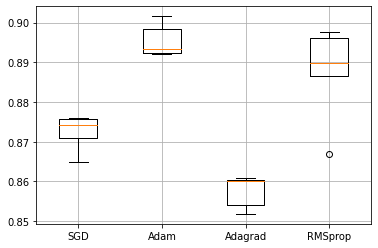

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50
k=5

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
  model=Sequential()
  model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2,activation='relu'))
  model.add(Dense(units=n_hidden3,activation='relu'))
  model.add(Dense(units=n_hidden4,activation='relu'))
  model.add(Dense(units=n_output,activation='softmax'))
  return model

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
  accuracy=[]
  for train_index,val_index in KFold(k).split(x_train):
    xtrain,xval=x_train[train_index],x_train[val_index]
    ytrain,yval=y_train[train_index],y_train[val_index]
    dmlp=build_model()
    dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    dmlp.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
    accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
  return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd=cross_validation(SGD())
acc_adam=cross_validation(Adam())
acc_adagrad=cross_validation(Adagrad())
acc_rmsprop=cross_validation(RMSprop())

# 네 모델의 정확률을 출력
print("SGD:", np.array(acc_sgd).mean())
print("Adam:", np.array(acc_adam).mean())
print("Adagrad:", np.array(acc_adagrad).mean())
print("RMSprop:", np.array(acc_rmsprop).mean())

import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()
